In [293]:
import sys
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
print(sys.version)
print(torch.__version__)
print(torchvision.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(cv2.__version__)

3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
1.9.1+cpu
0.10.1+cpu
1.21.2
3.4.3
4.5.3


# <center> Q1 

##### Q1. Image load / save. Load the `picket_fence.jpg` image provided. Print the data type of the image, and the data type of the pixels in the image. Print the image dimensions. Is the image accessed by (row,column) or (column,row)? What are the red/green/blue pixel values at (0,0)? In what order are the colors stored? What data type is the image? What data type are the pixels?

## <center> Answers

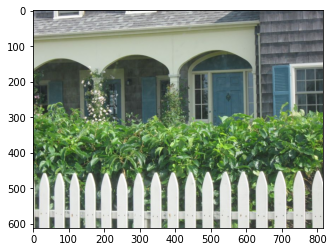

In [294]:
image1=cv2.imread("picket_fence.jpg")  #reading the image
image1=image1[:,:,::-1] #converting RGB to BGR
plt.imshow(image1)

In [295]:
print("Data type of Image is",image1.dtype)
print("Data type of pixels in the image is",image1[0][0].dtype)
print("Dimensions of image are height:{},width:{},depth:{}".format(*image1.shape))

Data type of Image is uint8
Data type of pixels in the image is uint8
Dimensions of image are height:612,width:816,depth:3


## import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

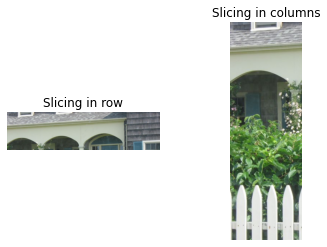

In [296]:
fig,ax=plt.subplots(1,2)

ax[0].set_title("Slicing in row")
ax[0].axis('off')
ax[0].imshow(image1[0:200,:]) #slicing rows


ax[1].set_title("Slicing in columns")
ax[1].axis('off')
ax[1].imshow(image1[:,:200]) #slicing columns

In [297]:
print("Image dimensions (length,width,depth) are", image1.shape)

Image dimensions (length,width,depth) are (612, 816, 3)


The above slicing shows that the images are accessed by row, column

In [298]:
rgbval=image1[0][0]
print('The values at 0,0 are red:{},green:{},blue:{}'.format(*rgbval))

The values at 0,0 are red:129,green:128,blue:126


The colors are sorted in the order Red, Green, Blue

In [299]:
print("Image data type is",image1.dtype)
print("Image pixels type is",image1[0][0].dtype)

Image data type is uint8
Image pixels type is uint8


# <center> Q2


##### Q2. Color channels. Create a new RGB image by setting the green and blue pixel values to zero everywhere. The resulting image should look red.

## <center> Answers

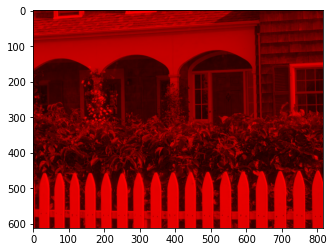

In [300]:
red_image=image1.copy()
red_image[:,:,1:]=red_image[:,:,1:]*0
plt.imshow(red_image)

# <center> Q3

##### Q3. Photographic negative. Create a new RGB image (from the original image) by subtracting each pixel value from 255. The resulting image should look like a photographic negative.

## <center> Answers

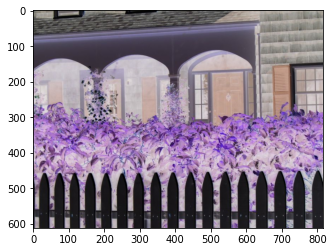

In [301]:
negative_image=255-image1[:,:,:]
plt.imshow(negative_image)

# <center> Q4

##### Q4. Swap color channels. Create a new RGB image (from the original image) by swapping the red and blue channels.

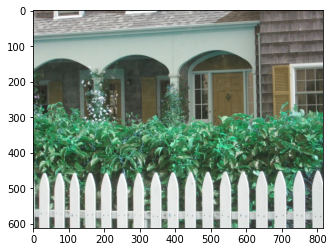

In [302]:
swap_image= image1.copy()
swap_image[:,:,[0,2]]=swap_image[:,:,[2,0]]
plt.imshow(swap_image)

# <center> Q5

##### Q4. Foliage detection. Create a new binary image that contains an `ON` pixel wherever the original input pixel is approximately green, and `OFF` everywhere else. (You will have to think about this a bit, but the solution is not hard.) Below is my output for comparison. What data type is the output image, and what data type are the pixels? Save the image to a `.png` file on disk; load the file in a separate image viewing program to verify that the output looks correct.

I used https://colorpicker.me/#0cf059 to pick green color

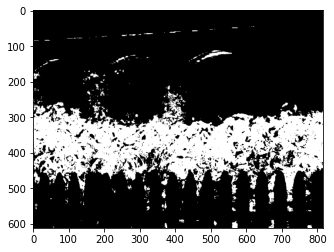

In [303]:
##### hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
mask=cv2.inRange(hsv, (50, 80, 0), (100, 255,255))
plt.imshow(mask,cmap='gray')

In [304]:
cv2.imwrite('Mask.jpg',mask)

True

# <center> Q6

Q6. Shift. Translate the original image to the right by 200 pixels, and down by 100 pixels. Fill in the
missing values with zero.

In [305]:
shift_x=200
shift_y=100
affine_translation_matrix=np.float32([
    [1,0,shift_x],
    [0,1,shift_y]
])

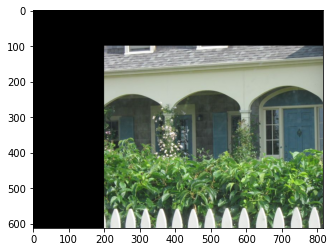

In [306]:
shifted_image=cv2.warpAffine(image1,affine_translation_matrix,(image1.shape[1],image1.shape[0]))
plt.imshow(shifted_image)

# <center> Q7

Q7. Rotate. Rotate the original image clockwise by 90 degrees.

In [312]:
img_center=(int(image1.shape[1]/2),int(image1.shape[0]/2))

rot_mat = cv2.getRotationMatrix2D( img_center,270, 1 )
rot_mat

array([[-1.8369702e-16, -1.0000000e+00,  7.1400000e+02],
       [ 1.0000000e+00, -1.8369702e-16, -1.0200000e+02]])

In [319]:

rotated_image=image1.copy()
rotated_image=cv2.warpAffine(rotated_image,rot_mat,(image1.shape[0],image1.shape[1]))

rotated_image=cv2.transform(image1)
plt.imshow(rotated_image)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'transform'
> Overload resolution failed:
>  - transform() missing required argument 'm' (pos 2)
>  - transform() missing required argument 'm' (pos 2)


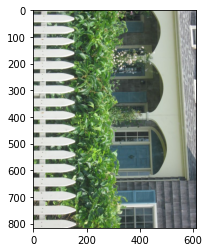

In [309]:
rot_image=cv2.rotate(image1,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rot_image)

## 

# <center> Q8

Q8. Similarity transform. Write a function to apply a similarity transform to an input image, yielding
an output image of the same size. The function should take scale, rotation angle, and
translation as input (all as floating point values). Use nearest neighbor interpolation for
simplicity, but be sure to use “inverse mapping” to ensure that every pixel in the output gets
painted. Test this on the original image above by passing the values scale=2.0, theta=45.0
(degrees), shift=[100,100]. (Yes, the order matters here, but the order is up to you, as is the
specific interface of the function.)

In [310]:

a=np.float32([[1,0,0],[0,1,0],[0,0,0]])